In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi
from scipy import integrate

from scipy.special import jv
from scipy.special import yv
from scipy.optimize import root

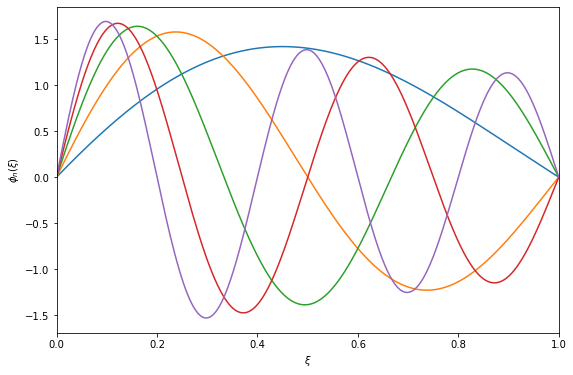

In [3]:
Pe = 1

def phi(xi,n):
    return np.exp(-Pe/2*xi)*np.sin(n*pi*xi)

I = [integrate.quad(lambda x: phi(x,n)**2, 0, 1)[0] for n in range(1,6)]


xi = np.linspace(0,1,500)

plt.figure(figsize=(9,6))
for n in range(1,6):
    plt.plot(xi, phi(xi,n)/np.sqrt(I[n-1]))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\phi_n(\xi)$')
plt.xlim(0,1)
plt.savefig('save_dir/xEF.pdf', bbox_inches="tight")
plt.show()

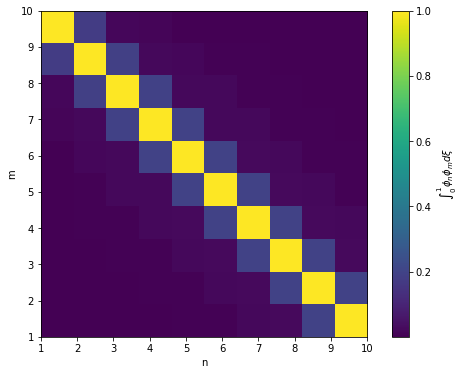

In [4]:
N = 10
I = [integrate.quad(lambda x: phi(x,n)**2, 0, 1)[0] for n in range(1,N+1)]
A = np.zeros((N,N))
for i in range(1,N+1):
    for j in range(1, N+1):
        A[i-1,j-1] = integrate.quad(lambda x: phi(x,i)*phi(x,j),0,1)[0] / np.sqrt(I[i-1]*I[j-1])
        
plt.figure(figsize=(9,6))
plt.imshow(A, extent=[1,N,1,N])
cbar = plt.colorbar()
cbar.set_label(r'$\int_0^1 \phi_n \phi_m d\xi$')
plt.xlabel('n')
plt.ylabel('m')
plt.savefig('save_dir/xcor.pdf', bbox_inches="tight")
plt.show()

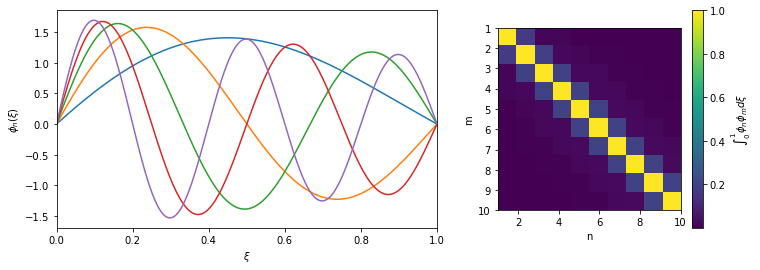

In [5]:
fig, axes = plt.subplots(1,2, figsize=(12,4), gridspec_kw={'width_ratios': [5,3]})

ax = axes[0]
for n in range(1,6):
    ax.plot(xi, phi(xi,n)/np.sqrt(I[n]))
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\phi_n(\xi)$')
ax.set_xlim(0,1)


ax = axes[1]
im = ax.imshow(A, extent=[1,N,N,1])
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$\int_0^1 \phi_n \phi_m d\xi$')
ax.set_xlabel('n')
ax.set_ylabel('m')
plt.savefig('save_dir/xEF_mcor.pdf', bbox_inches='tight')
plt.show()

## SEA

In [6]:
P = 0.01
q = 0.05

def phi_r(rho,par):
    return (rho+q)**(P/2)*jv(P/2, np.sqrt(par[0])*(rho+q)) + par[1]*(rho+q)**(P/2)*yv(P/2, np.sqrt(par[0])*(rho+q))

<ipython-input-6-eb8acbe221c4>:5: RuntimeWarning: invalid value encountered in sqrt
  return (rho+q)**(P/2)*jv(P/2, np.sqrt(par[0])*(rho+q)) + par[1]*(rho+q)**(P/2)*yv(P/2, np.sqrt(par[0])*(rho+q))


[array([8.44693095, 0.75780781]), array([37.20047041,  1.20782651]), array([86.00226915,  1.85968881]), array([154.70957873,   3.13234474]), array([243.25824174,   7.51685505]), array([351.61371847, -25.1209854 ]), array([479.75541854,  -4.72282723]), array([627.67022187,  -2.53843945]), array([795.34936003,  -1.66737702]), array([982.78675617,  -1.17782225])]


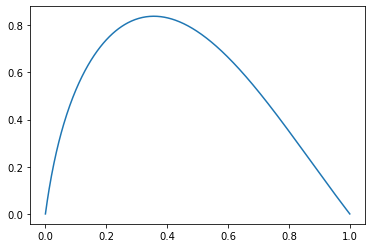

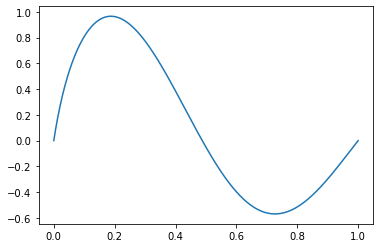

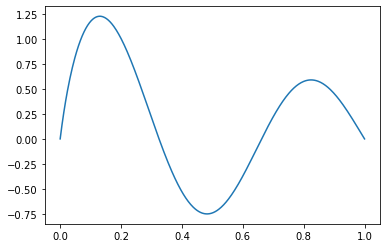

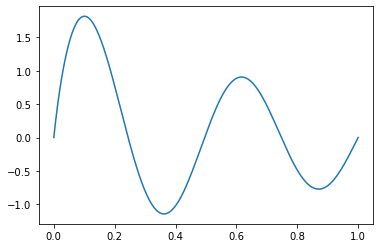

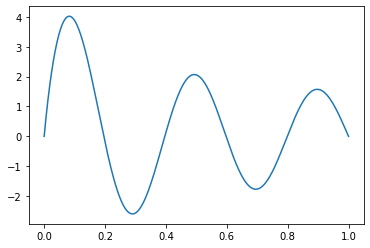

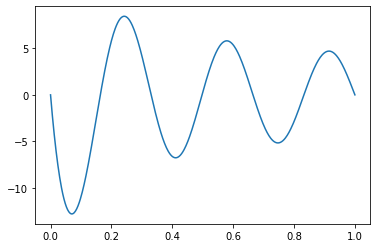

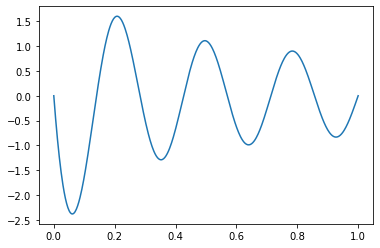

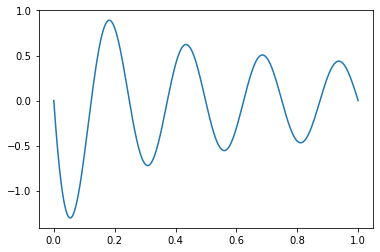

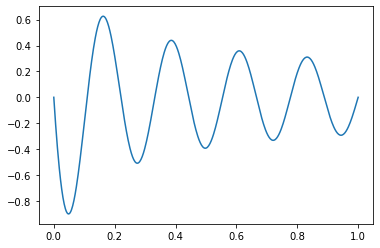

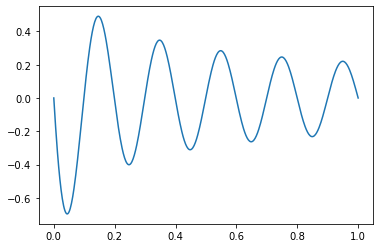

In [7]:
phi_bc0 = lambda rt: phi_r(0,rt)
phi_bc1 = lambda rt: phi_r(1,rt)

def func_r(rt):
    return phi_bc0(rt),phi_bc1(rt)

r = np.linspace(0,1,500)
def n_roots(rt):
    temp = 0
    if abs(phi_r(0,rt))>0.01: return -1
    elif abs(phi_r(1,rt))>0.01: return -1
    for j in range(10,len(r)-20):
        if phi_r(r[j],rt)*phi_r(r[j-1],rt)<0:
            temp+=1
    return temp

Nmax = 10

roots = [[0,0] for i in range(Nmax)]

for i in np.linspace(8,500,100):
    for j in np.linspace(-10,10,4):
        rt = root(func_r, x0 =(i,j)).x
        N = n_roots(rt)
#         print(rt)
#         plt.figure()
#         plt.plot(r, phi_r(r,rt))
#         plt.show()
        if N<Nmax:
            if N+1>0: #and roots[N][0] == 0:
                roots[N] = rt
print(roots)
                
      
for rt in roots:
    plt.figure()      
    plt.plot(r, phi_r(r,rt))
    plt.show()

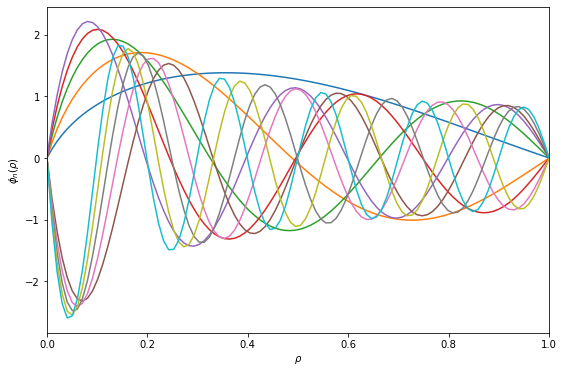

In [15]:
J = [integrate.quad(lambda r: phi_r(r,roots[n])**2, 0, 1)[0] for n in range(0,10)]


rho = np.linspace(0,1,100)

plt.figure(figsize=(9,6))
for n in range(0,10):
    plt.plot(rho, phi_r(rho,roots[n])/np.sqrt(J[n]))
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\phi_n(\rho)$')
plt.xlim(0,1)
plt.savefig('save_dir/rEF.pdf', bbox_inches='tight')
plt.show()

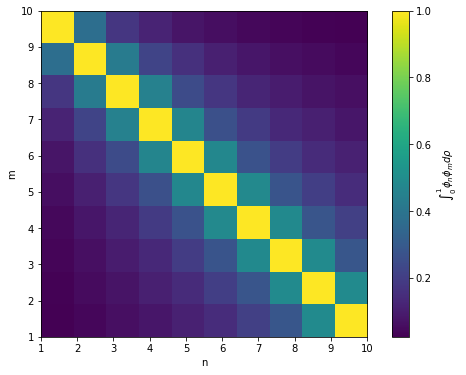

In [18]:
N = 10
A = np.zeros((N,N))
for i in range(0,N):
    for j in range(0, N):
        if phi_r(0.05,roots[i]) * phi_r(0.05,roots[j])>0:
            A[i,j] = integrate.quad(lambda r: phi_r(r,roots[i])*phi_r(r,roots[j]),0,1)[0] / np.sqrt(J[i]*J[j])
        else: A[i,j] = -integrate.quad(lambda r: phi_r(r,roots[i])*phi_r(r,roots[j]),0,1)[0] / np.sqrt(J[i]*J[j])
        
plt.figure(figsize=(9,6))
plt.imshow(A, extent=[1,N,1,N])
cbar = plt.colorbar()
cbar.set_label(r'$\int_0^1 \phi_n \phi_m d\rho$')
plt.xlabel('n')
plt.ylabel('m')
plt.savefig('save_dir/rcor.pdf', bbox_inches="tight")
plt.show()

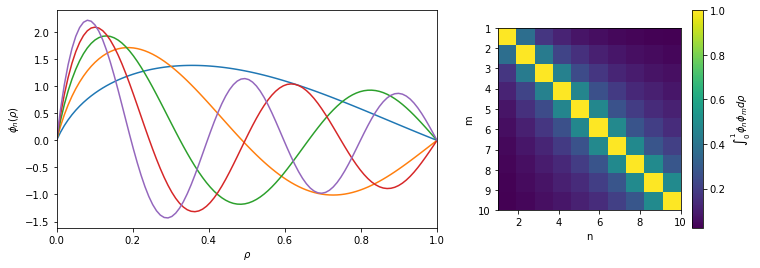

In [19]:

fig, axes = plt.subplots(1,2, figsize=(12,4), gridspec_kw={'width_ratios': [5,3]})

ax = axes[0]
for n in range(0,5):
    ax.plot(rho, phi_r(rho,roots[n])/np.sqrt(J[n]))
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$\phi_n(\rho)$')
ax.set_xlim(0,1)


ax = axes[1]
im = ax.imshow(A, extent=[1,N,N,1])
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$\int_0^1 \phi_n \phi_m d\rho$')
ax.set_xlabel('n')
ax.set_ylabel('m')
plt.savefig('save_dir/rEF_mcor.pdf', bbox_inches='tight')
plt.show()